In [1]:
import numpy as np
import pysindy as ps
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.linear_model import Lasso
from pysindy.differentiation import SmoothedFiniteDifference
import mpl_toolkits.mplot3d.axes3d as p3

# Initialize integrator keywords for solve_ivp to replicate the odeint defaults
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

In [13]:
x = np.linspace(0,1,20)
y = np.linspace(0,1,20)
z = np.linspace(0,1,20)
X,Y,Z  = np.meshgrid(x,y,z)

In [14]:
V = np.square(X) + np.sin(Y) - np.power(Z, 2)

/Users/lysi2/Documents/UNI_Imperial/Deep_Learning/DL/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


ValueError: Argument Z must be 2-dimensional.

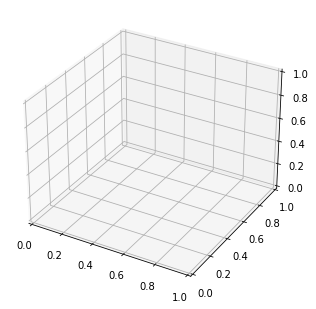

In [21]:
fig=plt.figure()
ax = p3.Axes3D(fig)
ax.plot_surface(x,y,z)
# ax.plot_surface(X[:,:,1],Y[:,:,1],V[:,:,1], color = 'red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.add_axes(ax)
plt.show()

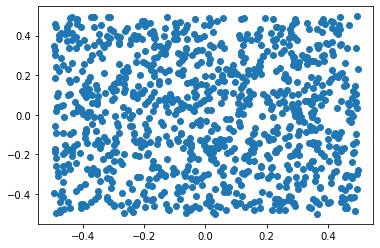

In [42]:
n = 1000
bounds = [0.5, 0.5, 0.5]
# xy_min = [-1.6, -4]
# xy_max = [1.6, 4]
data = np.random.uniform(low=[-x for x in bounds], high=bounds, size=(n,3))
plt.scatter(data[:,0], data[:,1])

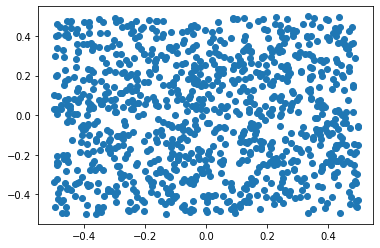

In [41]:
plt.scatter(data[:,0], data[:,2])

In [49]:
np.array(np.meshgrid(np.linspace(-1.6, 1.6, 10), np.linspace(-4,4, 10), indexing = 'ij')).shape

(2, 10, 10)

In [51]:
x = np.linspace(-bounds[0], bounds[0], 10)
y = np.linspace(-bounds[1], bounds[1], 10)
np.mgrid[x,y]

AttributeError: 'numpy.ndarray' object has no attribute 'step'

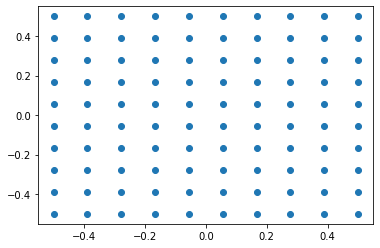

In [56]:
bounds = [0.5, 0.5]
n = [10,10]
x = np.linspace(-bounds[0], bounds[0], n[0])
y = np.linspace(-bounds[1], bounds[1], n[1])
X, Y = np.meshgrid(x, y)

s = X.shape
data = np.zeros((n[0]*n[1],2)) 

# convert mesh into point vector for which the model can be evaluated
c = 0
for i in range(s[0]):
    for j in range(s[1]):
        data[c,0] = X[i,j]
        data[c,1] = Y[i,j]
        c = c+1;
plt.scatter(data[:,0], data[:,1])

In [58]:
def meshgrid2(*arrs):
    arrs = tuple(reversed(arrs))
    lens = map(len, arrs)
    dim = len(arrs)
    sz = 1
    for s in lens:
       sz *= s
    ans = []
    for i, arr in enumerate(arrs):
        slc = [1]*dim
        slc[i] = lens[i]
        arr2 = np.asarray(arr).reshape(slc)
        for j, sz in enumerate(lens):
            if j != i:
                arr2 = arr2.repeat(sz, axis=j)
        ans.append(arr2)
    return tuple(ans)

g = meshgrid2(x, y)
positions = np.vstack(map(np.ravel, g))

TypeError: 'map' object is not subscriptable

In [21]:
bounds = [0.5, 0.5]
n = [10,10]
x = np.linspace(-bounds[0], bounds[0], n[0])
y = np.linspace(-bounds[1], bounds[1], n[1])
X, Y = np.meshgrid(x, y)
op = zip(*(x.flat for x in X))

In [23]:
X.shape

(10, 10)

In [24]:
np.concatenate([x,y], axis=1).shape

AxisError: axis 1 is out of bounds for array of dimension 1

In [25]:
import tensorflow as tf
def get_grid_of_points_2D(grid_range, grid_density):
    grid_x1s = tf.linspace(-grid_range,grid_range,grid_density)
    grid_x2s = tf.linspace(-grid_range,grid_range,grid_density)
    grid_v1s = tf.linspace(-grid_range,grid_range,grid_density)
    grid_v2s = tf.linspace(-grid_range,grid_range,grid_density)
    grid_xx1, grid_xx2, grid_vv1, grid_vv2 = tf.meshgrid(grid_x1s, grid_x2s, grid_v1s, grid_v2s)
    grid_points = tf.stack([tf.reshape(grid_xx1,[-1]),tf.reshape(grid_xx2,[-1]),tf.reshape(grid_vv1,[-1]), tf.reshape(grid_vv2,[-1])], axis=1)
    return grid_points

In [26]:
get_grid_of_points_2D(0.5, 100)

2022-08-11 19:27:56.437323: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(100000000, 4), dtype=float32, numpy=
array([[-0.5       , -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.48989898],
       [-0.5       , -0.5       , -0.5       , -0.479798  ],
       ...,
       [ 0.5       ,  0.5       ,  0.5       ,  0.47979796],
       [ 0.5       ,  0.5       ,  0.5       ,  0.48989898],
       [ 0.5       ,  0.5       ,  0.5       ,  0.5       ]],
      dtype=float32)>

In [27]:
def get_grid_of_points_1D(grid_range, grid_density):
    grid_x1s = tf.linspace(-grid_range,grid_range,grid_density)
    # grid_x2s = tf.linspace(-grid_range,grid_range,grid_density)
    grid_v1s = tf.linspace(-grid_range,grid_range,grid_density)
    # grid_v2s = tf.linspace(-grid_range,grid_range,grid_density)
    grid_xx1,grid_vv1 = tf.meshgrid(grid_x1s, grid_v1s)
    grid_points = tf.stack([tf.reshape(grid_xx1,[-1]),tf.reshape(grid_vv1,[-1])], axis=1)
    return grid_points

In [30]:
op = get_grid_of_points_1D(0.1, 10)

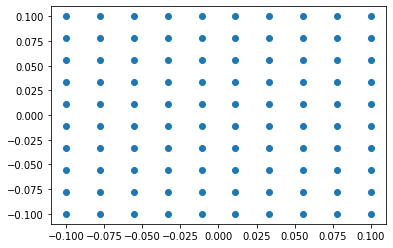

In [31]:
plt.scatter(op[:,0], op[:,1])

In [36]:
def get_grid_of_points_3D(grid_range, grid_density):
    grid_x1s = np.linspace(-grid_range,grid_range,grid_density)
    grid_x2s = np.linspace(-grid_range,grid_range,grid_density)
    grid_x3s = np.linspace(-grid_range,grid_range,grid_density)
    grid_xx1,grid_xx2, grid_xx3 = np.meshgrid(grid_x1s, grid_x2s, grid_x3s)
    grid_points = np.stack([tf.reshape(grid_xx1,[-1]),np.reshape(grid_xx2,[-1]), np.reshape(grid_xx3,[-1])], axis=1)
    return grid_points

In [37]:
op = get_grid_of_points_3D(0.1, 10)
op

array([[-0.1       , -0.1       , -0.1       ],
       [-0.1       , -0.1       , -0.07777778],
       [-0.1       , -0.1       , -0.05555556],
       ...,
       [ 0.1       ,  0.1       ,  0.05555556],
       [ 0.1       ,  0.1       ,  0.07777778],
       [ 0.1       ,  0.1       ,  0.1       ]])

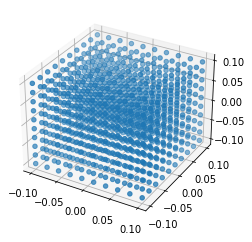

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(op[:,0], op[:,1], op[:,2])
plt.show()

In [ ]:
def get_grid_of_points_3D(grid_range, grid_density):
    grid_x1s = np.linspace(-grid_range,grid_range,grid_density)
    grid_x2s = np.linspace(-grid_range,grid_range,grid_density)
    grid_x3s = np.linspace(-grid_range,grid_range,grid_density)
    grid_xx1,grid_xx2, grid_xx3 = np.meshgrid(grid_x1s, grid_x2s, grid_x3s)
    grid_points = np.stack([tf.reshape(grid_xx1,[-1]),np.reshape(grid_xx2,[-1]), np.reshape(grid_xx3,[-1])], axis=1)
    return grid_points

In [40]:
bounds = [0.5,0.5,0.5]
first, *other = bounds
other

[0.5, 0.5]

In [139]:
bounds = [1.6,4]
n = [6, 15]
ls = np.stack([n, bounds],axis=1)
def get_grid_of_points(lms):
    ls = [np.linspace(-i,i,int(n)) for n, i in lms]
    mesh_ls = np.meshgrid(*ls)
    all_mesh = [np.reshape(x, [-1]) for x in mesh_ls]
    grid_points = np.stack(all_mesh, axis=1)
    return grid_points
    # return np.array(op)

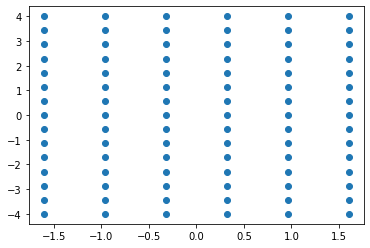

In [140]:
op = get_grid_of_points(ls)

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(op[:,0], op[:,1], op[:,2])
# plt.show()
plt.scatter(op[:,0], op[:,1])

In [135]:
b = np.stack([n, bounds],axis=1)
[np.linspace(-i,i,int(n)) for n, i in b]

[array([-1.6       , -1.24444444, -0.88888889, -0.53333333, -0.17777778,
         0.17777778,  0.53333333,  0.88888889,  1.24444444,  1.6       ]),
 array([-4.        , -3.72413793, -3.44827586, -3.17241379, -2.89655172,
        -2.62068966, -2.34482759, -2.06896552, -1.79310345, -1.51724138,
        -1.24137931, -0.96551724, -0.68965517, -0.4137931 , -0.13793103,
         0.13793103,  0.4137931 ,  0.68965517,  0.96551724,  1.24137931,
         1.51724138,  1.79310345,  2.06896552,  2.34482759,  2.62068966,
         2.89655172,  3.17241379,  3.44827586,  3.72413793,  4.        ])]

In [47]:
ls = [np.array([-0.5       , -0.38888889, -0.27777778, -0.16666667, -0.05555556,
         0.05555556,  0.16666667,  0.27777778,  0.38888889,  0.5       ]),
 np.array([-0.5       , -0.38888889, -0.27777778, -0.16666667, -0.05555556,
         0.05555556,  0.16666667,  0.27777778,  0.38888889,  0.5       ]),
 np.array([-0.5       , -0.38888889, -0.27777778, -0.16666667, -0.05555556,
         0.05555556,  0.16666667,  0.27777778,  0.38888889,  0.5       ])]
np.array(np.meshgrid(ls[0], ls[1], ls[2])).shape

(3, 10, 10, 10)

In [59]:
first, *others = ls
np.array(np.meshgrid(first, others)).shape

(2, 20, 10)

In [60]:
np.meshgrid(zip(ls))

[array([<zip object at 0x7fe854e67460>], dtype=object)]

In [61]:
for i zip(ls)

In [88]:
def meshgrid3(xi, copy=True, sparse=False, indexing='ij'):
    ndim = len(xi)


    s0 = (1,) * ndim
    output = [np.asanyarray(x).reshape(s0[:i] + (-1,) + s0[i + 1:])
              for i, x in enumerate(xi)]

    if indexing == 'xy' and ndim > 1:
        # switch first and second axis
        output[0].shape = (1, -1) + s0[2:]
        output[1].shape = (-1, 1) + s0[2:]

    if not sparse:
        # Return the full N-D matrix (not only the 1-D vector)
        output = np.broadcast_arrays(*output, subok=True)

    if copy:
        output = [x.copy() for x in output]

    return output

In [73]:
def temp(l):
    for i in l:
        print(l)

In [75]:
len(ls)

3

In [99]:
l = [1,2,3,4,5]

def my_func(*args):
    print(args)
my_func(*l)

(1, 2, 3, 4, 5)


In [83]:
np.meshgrid(x)

[array([-0.5       , -0.5       , -0.5       , -0.38888889, -0.38888889,
        -0.38888889, -0.27777778, -0.27777778, -0.27777778, -0.16666667,
        -0.16666667, -0.16666667, -0.05555556, -0.05555556, -0.05555556,
         0.05555556,  0.05555556,  0.05555556,  0.16666667,  0.16666667,
         0.16666667,  0.27777778,  0.27777778,  0.27777778,  0.38888889,
         0.38888889,  0.38888889,  0.5       ,  0.5       ,  0.5       ])]

In [96]:
axis_coords = np.meshgrid(x, y, indexing='xy')
data = np.hstack([c.reshape(-1, 1) for c in axis_coords])

In [98]:
data.shape

(300, 2)

In [80]:
np.meshgrid(print(i) for i in ls)

[array([<generator object <genexpr> at 0x7fe854f57850>], dtype=object)]

In [145]:
bounds = [0.5, 0.5, 0.5]
# n_x, n_y
# n = [20, 20]
# n_t = [50, 50]
n = [5, 5, 5]
data = np.random.uniform(low=[ -x for x in bounds], high=bounds, size=(np.prod(n),3))

In [146]:
data.shape

(125, 3)

In [147]:
Ep = np.random.uniform(0,1,(125,1))
Ee = np.random.uniform(0,1,(125,))

In [148]:
np.reshape(Ep, (25,3))

ValueError: cannot reshape array of size 125 into shape (25,3)

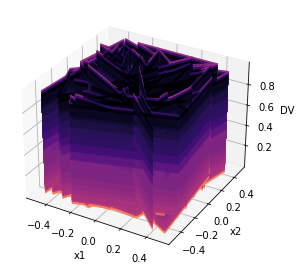

In [165]:
fig = plt.figure(figsize=(10,10))
# ax = plt.axes(projection='3d')
ax = fig.add_subplot(1, 2, 1, projection='3d')

# ax.set_title('m = {}'.format(m))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('DV');
ax.plot_surface(data[:,0], data[:,1], Ep, rstride=1, cstride=1,
                        cmap='magma_r', edgecolor='none', alpha = 0.8)

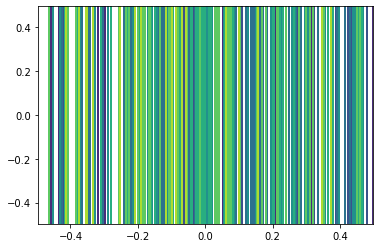

In [170]:
plt.contour(data[:,0], data[:,1], new_f[0,:,:])

In [160]:
new = np.concatenate([np.expand_dims(data[:,2],1), np.expand_dims(Ee, axis=1)], axis=1)
new.shape

new_f = np.array(np.meshgrid(data[:,2], Ee))

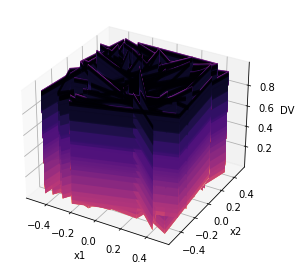

In [162]:
fig = plt.figure(figsize=(10,10))
# ax = plt.axes(projection='3d')
ax = fig.add_subplot(1, 2, 1, projection='3d')

# ax.set_title('m = {}'.format(m))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('DV');
ax.plot_surface(data[:,0], data[:,1], new_f[1,:,:], rstride=1, cstride=1,
                        cmap='magma_r', edgecolor='none', alpha = 0.8)

In [164]:
new_f[0,:,:].shape

(125, 125)

/Users/lysi2/Documents/UNI_Imperial/Deep_Learning/DL/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'lw'
  


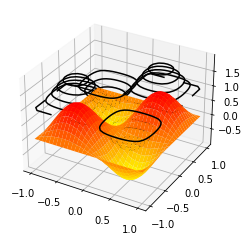

In [171]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X, Y = np.mgrid[-1:1:30j, -1:1:30j]
Z = np.sin(np.pi*X)*np.sin(np.pi*Y)


ax.plot_surface(X, Y, Z, cmap="autumn_r", lw=0, rstride=1, cstride=1)
ax.contour(X, Y, Z+1, 10, lw=3, colors="k", linestyles="solid")
plt.show()

/Users/lysi2/Documents/UNI_Imperial/Deep_Learning/DL/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'lw'
  
/Users/lysi2/Documents/UNI_Imperial/Deep_Learning/DL/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'lw'
  import sys


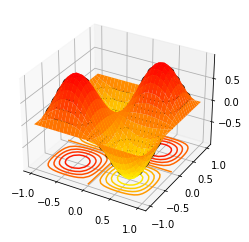

In [175]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X, Y = np.mgrid[-1:1:30j, -1:1:30j]
Z = np.sin(np.pi*X)*np.sin(np.pi*Y)
ax.plot_surface(X, Y, Z, cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.contour(X, Y, Z, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(X, Y, Z, 10, lw=3, colors="k", linestyles="solid")
plt.show()